# Marketing insights for E-commerce company

Business Objective:
The e-commerce company is expecting below analysis using the data
1. Calculate Invoice amount or sale_amount or revenue for each transaction and item level
- Invoice Value =((Quantity*Avg_price)*(1-Dicount_pct)*(1+GST))+Delivery_Charges

2. Perform Detailed exploratory analysis
- Understanding how many customers acquired every month
- Understand the retention of customers on month on month basis
- How the revenues from existing/new customers on month on month basis
- How the discounts playing role in the revenues?
- Analyse KPI’s like Revenue, number of orders, average order value, number of customers (existing/new), quantity, by category, by month, by week, by day etc…
- Understand the trends/seasonality of sales by category, location, month etc…
- How number order varies and sales with different days?
- Calculate the Revenue, Marketing spend, percentage of marketing spend out of
revenue, Tax, percentage of delivery charges by month.
- How marketing spend is impacting on revenue?
- Which product was appeared in the transactions?
- Which product was purchased mostly based on the quantity?

3. Performing Customer Segmentation
- Heuristic (Value based, RFM) – Divide the customers into Premium, Gold, Silver, Standard customers and define strategy on the same.
- Scientific (Using K-Means) & Understand the profiles. Define strategy for each segment.

4. Predicting Customer Lifetime Value (Low Value/Medium Value/High Value)
- First define dependent variable with categories low value, medium value, high value using customer revenue.
- Then perform Classification model

5. Cross-Selling (Which products are selling together)
- You can perform exploratory analysis & market basket analysis to understand which of items can be bundled together.

6. Predicting Next Purchase Day(How soon each customer can visit the store (0-30 days, 30-60
days, 60-90 days, 90+ days)
- For this, we need create dependent variable at customer level (average days per one transaction for only repeat customers and divide into groups 0-30 days, 30-60 days, 60-90 days and 90+ days) then build classification model to predict next purchase of given customer.

7. Perform cohort analysis by defining below cohorts
- Customers who started in each month and understand their behaviour
- Which Month cohort has maximum retention?

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans

## Load and understand data

In [2]:
customer_df = pd.read_excel('Datasets/CustomersData.xlsx')
discountCoupons_df = pd.read_csv('Datasets/Discount_Coupon.csv')
marketing_spending_df = pd.read_csv('Datasets/Marketing_Spend.csv')
online_sales_df = pd.read_csv('Datasets/Online_Sales.csv')
tax_amount_df = pd.read_excel('Datasets/Tax_amount.xlsx')

In [3]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   int64 
 1   Gender         1468 non-null   object
 2   Location       1468 non-null   object
 3   Tenure_Months  1468 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.0+ KB


In [4]:
discountCoupons_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Month              204 non-null    object
 1   Product_Category   204 non-null    object
 2   Coupon_Code        204 non-null    object
 3   Discount_pct       204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


In [5]:
marketing_spending_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


In [6]:
online_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  int64  
 1   Transaction_ID       52924 non-null  int64  
 2   Transaction_Date     52924 non-null  int64  
 3   Product_SKU          52924 non-null  object 
 4   Product_Description  52924 non-null  object 
 5   Product_Category     52924 non-null  object 
 6   Quantity             52924 non-null  int64  
 7   Avg_Price            52924 non-null  float64
 8   Delivery_Charges     52924 non-null  float64
 9   Coupon_Status        52924 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 4.0+ MB


In [7]:
tax_amount_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Category  20 non-null     object 
 1   GST               20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 452.0+ bytes


## 1. Calculate Invoice amount or sale_amount or revenue for each transaction and item level
- Invoice Value =((Quantity*Avg_price)*(1-Dicount_pct)*(1+GST))+Delivery_Charges

<Axes: title={'center': 'Figure-1a. histogram for coupon use'}, xlabel='Coupon_Status', ylabel='Count'>

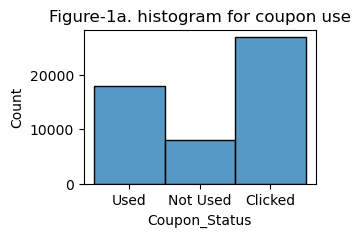

In [8]:
## online_sales_df has Quantity, Avg_Price, Delivery_Charges
## discountCoupons_df has Discount_pct
## tax_amount_df has GST
## What is coupon status?
plt.figure(figsize=(3,2))
plt.title("Figure-1a. histogram for coupon use")
sns.histplot(online_sales_df.Coupon_Status)


In [9]:
print(online_sales_df.columns)
print(discountCoupons_df.columns)
online_sales_df.info()

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status'],
      dtype='object')
Index(['Month', 'Product_Category ', 'Coupon_Code', 'Discount_pct'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  int64  
 1   Transaction_ID       52924 non-null  int64  
 2   Transaction_Date     52924 non-null  int64  
 3   Product_SKU          52924 non-null  object 
 4   Product_Description  52924 non-null  object 
 5   Product_Category     52924 non-null  object 
 6   Quantity             52924 non-null  int64  
 7   Avg_Price            52924 non-null  float64
 8   Delivery_Charges     52924 non-null  float64
 9   Coupon_Status        52924 non-null

online_sales_df Transaction_Date has nulls = 0


Text(0.5, 1.0, 'Figure-1b. Histogram for transaction dates (n=52924)')

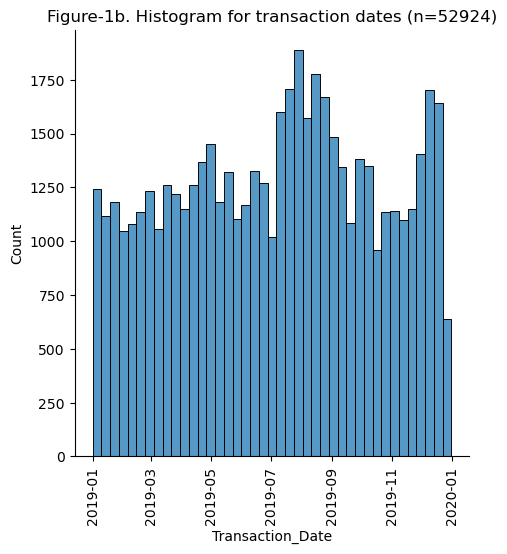

In [10]:
## convert Transaction_Date from online_sales_df to date
online_sales_df['Transaction_Date'] = pd.to_datetime(online_sales_df['Transaction_Date'], 
                                                  format='%Y%m%d')
print(f'online_sales_df Transaction_Date has nulls = {online_sales_df[online_sales_df['Transaction_Date'].isna()].shape[0]}')
sns.displot(online_sales_df['Transaction_Date'])
plt.xticks(rotation=90)
plt.title(f"Figure-1b. Histogram for transaction dates (n={online_sales_df[online_sales_df['Transaction_Date'].notna()].shape[0]})")

In [11]:
### discountCoupons_df 'Product_Category ' has an extra whitespace !!!!!
print(f'online_sales_df column names = {online_sales_df.columns}')
print(f'discountCoupons_df column names = {discountCoupons_df.columns}')

online_sales_df column names = Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status'],
      dtype='object')
discountCoupons_df column names = Index(['Month', 'Product_Category ', 'Coupon_Code', 'Discount_pct'], dtype='object')


In [12]:
discountCoupons_df.rename(columns={'Product_Category ':'Product_Category'}, inplace=True)

In [13]:
# the combining needs to be on the basis of Month and Product_Category
# Month needs to be derived from online_sales_df.Transaction_Date
online_sales_df['Month'] = online_sales_df['Transaction_Date'].dt.strftime('%B')

online_sales_coupons_combined = pd.merge(online_sales_df, discountCoupons_df, 
                                         on=['Product_Category','Month'], 
                                         how='left')
online_sales_coupons_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  int64         
 1   Transaction_ID       52924 non-null  int64         
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924 non-null  object        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64       
 9   Coupon_Status        52924 non-null  object        
 10  Month                52924 non-null  object        
 11  Coupon_Code          4516 non-null   object        
 12  Discount_pct         4516 non-null   float64       
dtypes: datetime64[ns](1), float64(3

In [14]:
## Transaction_Date == Dransaction_Date !! 
## print((online_sales_coupons_combined['Transaction_Date'] == 
## online_sales_coupons_combined['Dransaction_Date']).value_counts(dropna=False))
## online_sales_coupons_combined.drop(columns = ['Dransaction_Date'], inplace=True)

In [15]:
## to this we need to attach GST (tax) from ## tax_amount_df table
tax_amount_df.columns

Index(['Product_Category', 'GST'], dtype='object')

In [16]:
online_sales_coupons_tax_combined = pd.merge(online_sales_coupons_combined, tax_amount_df, on=['Product_Category'], how='left')
print(online_sales_coupons_tax_combined.columns)
online_sales_coupons_tax_combined.info()

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Month', 'Coupon_Code',
       'Discount_pct', 'GST'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  int64         
 1   Transaction_ID       52924 non-null  int64         
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924 non-null  object        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64  

In [17]:
def create_histogram_collage(data, cols, nrows, ncols, title):
  fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8, 6))
  fig.subplots_adjust(hspace=0.3, wspace=0.3)  # Adjust spacing between subplots

  for i, col in enumerate(cols):
    row = i // ncols
    col = i % ncols
    ax = axes[row, col]
    ax.hist(data[cols[i]], bins=10)  # Adjust bins as needed
    ax.set_title(cols[i])
  fig.suptitle(title)

  plt.show()

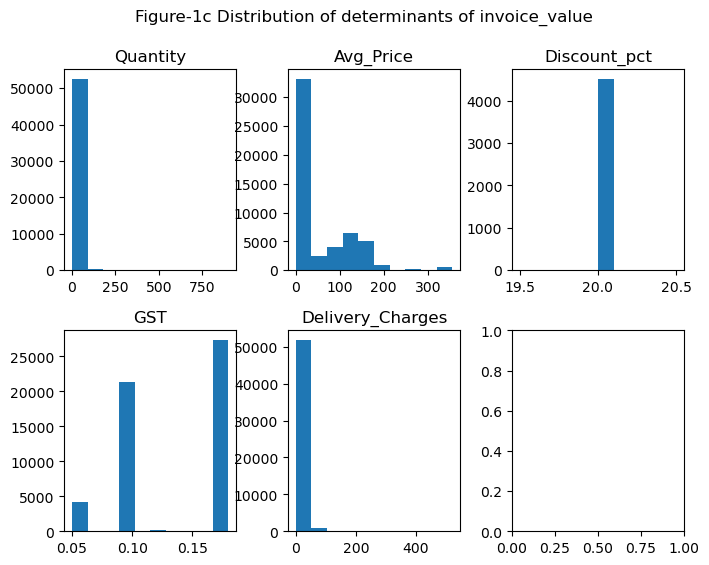

In [18]:
osct = online_sales_coupons_tax_combined.copy()
cols2plot = ['Quantity', 'Avg_Price', 'Discount_pct', 'GST', 'Delivery_Charges']
create_histogram_collage(osct, cols2plot, 2,3, "Figure-1c Distribution of determinants of invoice_value")

In [19]:
osct[cols2plot].describe()

,Quantity,Avg_Price,Discount_pct,GST,Delivery_Charges
count,52924.000000,52924.000000,4516.0,52924.000000,52924.000000
mean,4.497638,52.237646,20.0,0.137462,10.517630
std,20.104711,64.006882,0.0,0.045825,19.475613
min,1.000000,0.390000,20.0,0.050000,0.000000
25%,1.000000,5.700000,20.0,0.100000,6.000000
50%,1.000000,16.990000,20.0,0.180000,6.000000
75%,2.000000,102.130000,20.0,0.180000,6.500000
max,900.000000,355.740000,20.0,0.180000,521.360000


In [20]:
def check_null_0_NaN(df, col):
    print(f"{col} = 0 in {(df[col] == 0).sum()} rows")
    print(f"{col} is NaN in {df[col].isna().sum()} rows.")
    print(f"{col} is Null in {df[col].isnull().sum()} rows.")
    print(f"{col} varies from {min(osct[col])} to {max(osct[col])}")

for col in cols2plot:
    check_null_0_NaN(osct, col)

Quantity = 0 in 0 rows
Quantity is NaN in 0 rows.
Quantity is Null in 0 rows.
Quantity varies from 1 to 900
Avg_Price = 0 in 0 rows
Avg_Price is NaN in 0 rows.
Avg_Price is Null in 0 rows.
Avg_Price varies from 0.39 to 355.74
Discount_pct = 0 in 0 rows
Discount_pct is NaN in 48408 rows.
Discount_pct is Null in 48408 rows.
Discount_pct varies from nan to nan
GST = 0 in 0 rows
GST is NaN in 0 rows.
GST is Null in 0 rows.
GST varies from 0.05 to 0.18
Delivery_Charges = 0 in 162 rows
Delivery_Charges is NaN in 0 rows.
Delivery_Charges is Null in 0 rows.
Delivery_Charges varies from 0.0 to 521.36


_Discount_pct is interesting we need to not times/multiply it when it is 0, but first it needs to be converted to a fraction._

In [21]:
##Invoice Value =((Quantity*Avg_price)*(1-Dicount_pct)*(1+GST))+Delivery_Charges

osct['base_invoice'] = (osct['Quantity']*osct['Avg_Price'])
osct['price_with_discount'] = np.where(osct['Discount_pct'].isnull(), 
                                    osct['base_invoice'], 
                                    osct['base_invoice']*(1-(osct['Discount_pct']/100))
                               )

osct['discount_applied'] = osct['base_invoice'] - osct['price_with_discount']
osct['tax_applied'] = osct['price_with_discount']*osct['GST']

osct['invoice_value'] = (osct['price_with_discount']*(1+osct['GST']))+osct['Delivery_Charges']
osct['invoice_value_ifNoDiscount'] = (osct['base_invoice']*(1+osct['GST']))+osct['Delivery_Charges']
osct.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST,base_invoice,price_with_discount,discount_applied,tax_applied,invoice_value,invoice_value_ifNoDiscount
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,January,NaN,NaN,0.10,153.71,153.71,0.0,15.371,175.581,175.581
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,January,NaN,NaN,0.10,153.71,153.71,0.0,15.371,175.581,175.581
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,January,NaN,NaN,0.10,2.05,2.05,0.0,0.205,8.755,8.755
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,January,NaN,NaN,0.18,87.65,87.65,0.0,15.777,109.927,109.927
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,January,NaN,NaN,0.18,16.50,16.50,0.0,2.970,25.970,25.970


Text(0.5, 1.0, 'Figure-1d Distribution of invoice value across sales')

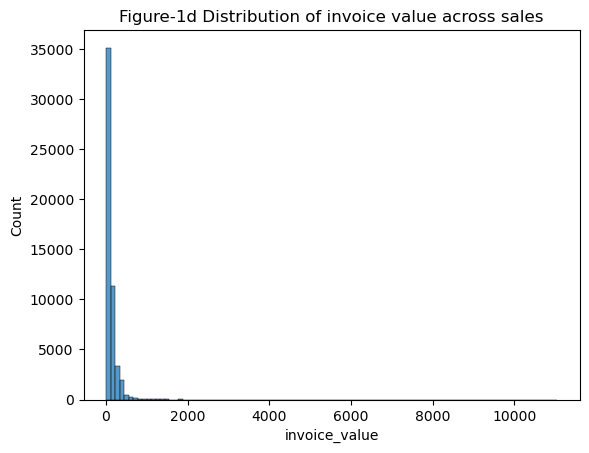

In [22]:
sns.histplot(osct['invoice_value'], bins=100)
plt.title("Figure-1d Distribution of invoice value across sales")

## 2. Perform Detailed exploratory analysis
- Understanding how many customers acquired every month
- Understand the retention of customers on month on month basis
- How the revenues from existing/new customers on month on month basis
- How the discounts playing role in the revenues?
- Analyse KPI’s like Revenue, number of orders, average order value, number of customers (existing/new), quantity, by category, by month, by week, by day etc…
- Understand the trends/seasonality of sales by category, location, month etc…
- How number order varies and sales with different days?
- Calculate the Revenue, Marketing spend, percentage of marketing spend out of
revenue, Tax, percentage of delivery charges by month.
- How marketing spend is impacting on revenue?
- Which product was appeared in the transactions?
- Which product was purchased mostly based on the quantity?

In [23]:
f2a = "Figure-2a Customers acquisition per month"
osct['Year'] = osct['Transaction_Date'].dt.year
osct['Month_num'] = osct['Transaction_Date'].dt.month
osct.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Month', 'Coupon_Code',
       'Discount_pct', 'GST', 'base_invoice', 'price_with_discount',
       'discount_applied', 'tax_applied', 'invoice_value',
       'invoice_value_ifNoDiscount', 'Year', 'Month_num'],
      dtype='object')

In [24]:
cust_acquired_on = pd.DataFrame(osct.groupby('CustomerID')['Transaction_Date'].min()).reset_index()
cust_acquired_on.rename(columns={'Transaction_Date': 'customer_acquisition_date'}, inplace=True)
osct = pd.merge(osct, cust_acquired_on, how='left', on='CustomerID')
osct.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,GST,base_invoice,price_with_discount,discount_applied,tax_applied,invoice_value,invoice_value_ifNoDiscount,Year,Month_num,customer_acquisition_date
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,0.10,153.71,153.71,0.0,15.371,175.581,175.581,2019,1,2019-01-01
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,0.10,153.71,153.71,0.0,15.371,175.581,175.581,2019,1,2019-01-01
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,...,0.10,2.05,2.05,0.0,0.205,8.755,8.755,2019,1,2019-01-01
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,...,0.18,87.65,87.65,0.0,15.777,109.927,109.927,2019,1,2019-01-01
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,...,0.18,16.50,16.50,0.0,2.970,25.970,25.970,2019,1,2019-01-01


In [25]:
cust_acquisition_per_month = osct[osct['customer_acquisition_date'] == osct['Transaction_Date']].groupby(['Month_num', 'Year'])['CustomerID'].nunique().reset_index()
cust_acquisition_per_month.rename(columns={'CustomerID': 'new_customers_acquired'}, inplace=True)
cust_acquisition_per_month.sort_values(by='Month_num', inplace=True)
print("Table-1 Customer aquisition per month")
display(cust_acquisition_per_month)
## cust_acquired_on

Table-1 Customer aquisition per month


,Month_num,Year,new_customers_acquired
0,1,2019,215
1,2,2019,96
2,3,2019,177
3,4,2019,163
4,5,2019,112
5,6,2019,137
6,7,2019,94
7,8,2019,135
8,9,2019,78
9,10,2019,87


In [26]:
def set_monthly_xticks(val):
    plt.xticks(ticks=range(val, val+12,1),
               labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
def set_day_of_week_ticks():
    plt.xticks(ticks=[0,1,2,3,4,5,6],
               labels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])

Text(0.5, 1.0, 'Figure-2a Customers acquisition per month')

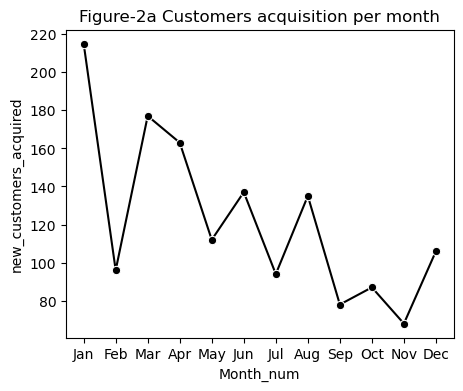

In [27]:
plt.figure(figsize=(5,4))
sns.lineplot(data=cust_acquisition_per_month, x='Month_num', y='new_customers_acquired', color='black', marker='o')
set_monthly_xticks(1)
plt.title(f2a)

In [28]:
osct['customer_acquisition_Month'] = osct['customer_acquisition_date'].dt.month
osct['customer_acquisition_Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [29]:
# Understand the retention of customers on month on month basis
# monthly retention = (unique_customers_this_month-new_customers_acquired)/customers_at_start_of_month
f2_aim = "Figure-2b Customer retention on monthly basis"

osct['new_existing_this_month'] = np.where(osct['customer_acquisition_Month'] == osct['Month_num'], 'new','existing')
osct_retention_df = osct[['CustomerID','Month_num','new_existing_this_month']].drop_duplicates().groupby(['Month_num','new_existing_this_month']).count().reset_index()
osct_retention_df.rename(columns={'CustomerID': 'CustomerCount'}, inplace=True)
## display(osct_retention_df)
## sns.barplot(data=osct_retention_df, x='Month_num', y='CustomerCount', hue='new_existing_this_month')
## plt.title("Figure-2b.1 Returning vs New Customers per month.")
## plt.xticks(ticks=[0,1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 
##            labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

Customer Retention Rate=((E−N)/S)×100
Where:

E = Number of customers at the end of the period (active ones, who ordered in the period)
N = Number of new customers acquired during the period
S = Number of customers at the start of the period ()

In [30]:
osct_retention_df = osct_retention_df.pivot(index=['Month_num'], columns='new_existing_this_month', values='CustomerCount').reset_index()

prior_month_customers = osct_retention_df['new'].to_list()
prior_month_customers.insert(0,0)

osct_retention_df['prior_month_customers'] = prior_month_customers[:-1]
osct_retention_df['total'] = osct_retention_df['existing'] + osct_retention_df['new']

osct_retention_df['retention_rate'] = (osct_retention_df['total']-osct_retention_df['new'])/osct_retention_df['prior_month_customers']

osct_retention_df.columns

Index(['Month_num', 'existing', 'new', 'prior_month_customers', 'total',
       'retention_rate'],
      dtype='object', name='new_existing_this_month')

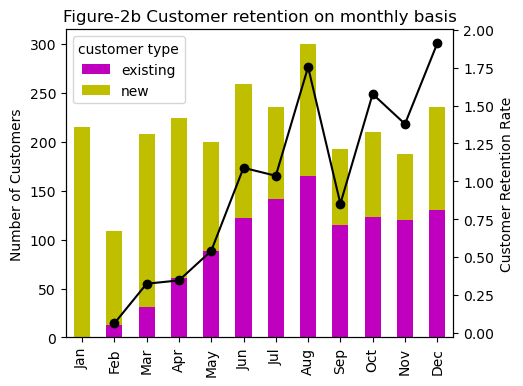

In [31]:
fig, ax1 = plt.subplots(figsize=(5,4))
osct_retention_df[['existing','new']].plot(kind='bar', stacked='True', ax=ax1, color=['m','y'])
ax2 = ax1.twinx() ## combining plots using twinx()
ax2.plot(osct_retention_df['retention_rate'], color='black', marker='o')
set_monthly_xticks(0)
ax1.set_ylabel("Number of Customers")
ax2.set_ylabel("Customer Retention Rate")
plt.title(f2_aim)
ax1.legend(title='customer type', loc='upper left')

In [32]:
f2c = "Figure 2c. Revenues from existing vs new customers"
## label existing and new customers per month

osct_summ = osct[['CustomerID','new_existing_this_month','Month_num', 'invoice_value']].groupby(['CustomerID','new_existing_this_month','Month_num'])['invoice_value'].sum().reset_index()

osct_summ = osct_summ.groupby(['Month_num','new_existing_this_month'])['invoice_value'].sum().reset_index()
osct_summ = osct_summ.pivot(index='Month_num', columns='new_existing_this_month', values='invoice_value').reset_index()
osct_summ['perc_revenue_from_return_customers'] = osct_summ['existing']*100/(osct_summ['new']+osct_summ['existing'])

display(osct_summ)

new_existing_this_month,Month_num,existing,new,perc_revenue_from_return_customers
0,1,NaN,508514.75510,NaN
1,2,49784.68560,347080.97140,12.544468
2,3,74933.23940,378271.82790,16.534069
3,4,201853.32260,290706.38430,40.980478
4,5,115067.71388,203488.58668,36.121625
5,6,160076.14910,236926.78480,40.321150
6,7,279620.57080,185668.44810,60.096104
7,8,263821.96240,243114.64760,52.042397
8,9,260016.98090,180805.44490,58.984518
9,10,230185.27790,265442.44060,46.443181


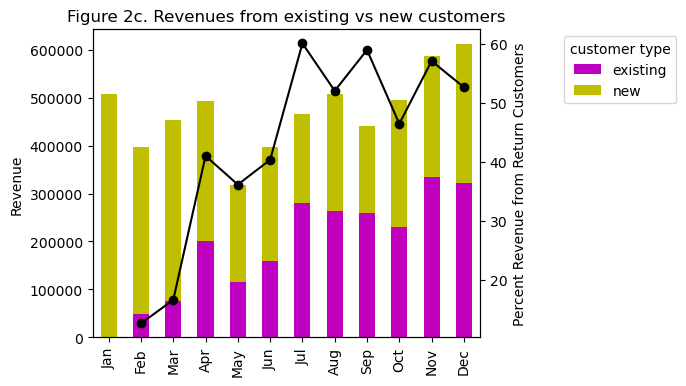

In [33]:
plt.clf
fig, ax1 = plt.subplots(figsize=(5,4))
osct_summ[['existing','new']].plot(kind='bar', stacked='True', ax=ax1, color=['m','y'])

ax2 = ax1.twinx() ## combining plots using twinx()
ax2.plot(osct_summ['perc_revenue_from_return_customers'], color='black', marker='o')

set_monthly_xticks(0)
ax1.set_ylabel("Revenue")
ax2.set_ylabel("Percent Revenue from Return Customers")
plt.title(f2c)
ax1.legend(title='customer type', loc='upper left', bbox_to_anchor=(1.2, 1))

In [34]:
## How the discounts playing role in the revenues?
fig2D = "Figure 2d. Revenues are lower in the May where Discounts are Offered"
osct['Discount_pct'] = osct['Discount_pct'].fillna(0)

osct_discount_summ = osct[['Month_num','Discount_pct','invoice_value']].groupby(['Month_num','Discount_pct'])['invoice_value'].sum().reset_index()
osct_discount_summ = osct_discount_summ.pivot(index='Month_num', columns='Discount_pct', values='invoice_value').reset_index()

osct_noDiscount_model = osct[['Month_num','invoice_value_ifNoDiscount']].groupby(['Month_num'])['invoice_value_ifNoDiscount'].sum().reset_index()

osct_discount_summ = pd.merge(osct_discount_summ, osct_noDiscount_model, how='left', on='Month_num')

display(osct_discount_summ)

osct_discount_summ.columns

,Month_num,0.0,20.0,invoice_value_ifNoDiscount
0,1,508514.7551,NaN,508514.7551
1,2,396865.6570,NaN,396865.6570
2,3,453205.0673,NaN,453205.0673
3,4,492559.7069,NaN,492559.7069
4,5,4918.3312,313637.96936,386779.2954
5,6,397002.9339,NaN,397002.9339
6,7,465289.0189,NaN,465289.0189
7,8,506936.6100,NaN,506936.6100
8,9,440822.4258,NaN,440822.4258
9,10,495627.7185,NaN,495627.7185


Index(['Month_num', 0.0, 20.0, 'invoice_value_ifNoDiscount'], dtype='object')

Text(0.5, 1.0, 'Figure 2d. Revenues are lower in the May where Discounts are Offered')

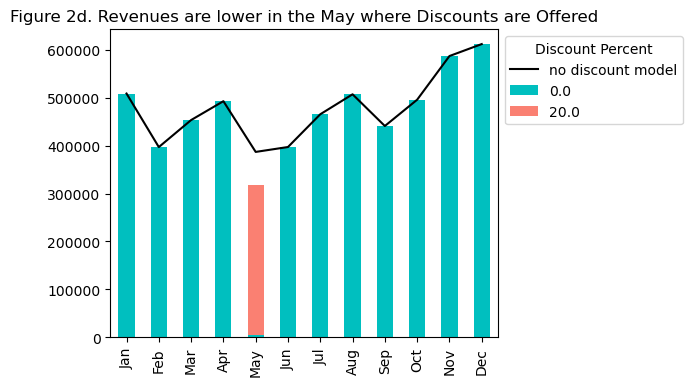

In [35]:
fig, ax1 =plt.subplots(figsize=(5,4))
osct_discount_summ[[0.0,20.0]].plot(kind='bar', stacked=True, ax=ax1, color=['c','salmon'])
ax1.plot(osct_discount_summ['invoice_value_ifNoDiscount'], color='black', label='no discount model')
plt.legend(title='Discount Percent', loc='upper left', bbox_to_anchor=(1, 1))
set_monthly_xticks(0)
plt.title(fig2D)

__It seems that discount did not have an effect on Sales and therefore Revenues went down that month. Now it is possible that that was one bad month or so. It is a statistical problem of having only 1 event!_

In [36]:
## Analyse KPI’s like Revenue, number of orders, average order value, number of customers (existing/new), quantity, by category, by month, by week, by day etc…
osct['week'] = osct['Transaction_Date'].dt.isocalendar().week
osct['day'] = osct['Transaction_Date'].dt.dayofweek
osct.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Month', 'Coupon_Code',
       'Discount_pct', 'GST', 'base_invoice', 'price_with_discount',
       'discount_applied', 'tax_applied', 'invoice_value',
       'invoice_value_ifNoDiscount', 'Year', 'Month_num',
       'customer_acquisition_date', 'customer_acquisition_Month',
       'new_existing_this_month', 'week', 'day'],
      dtype='object')

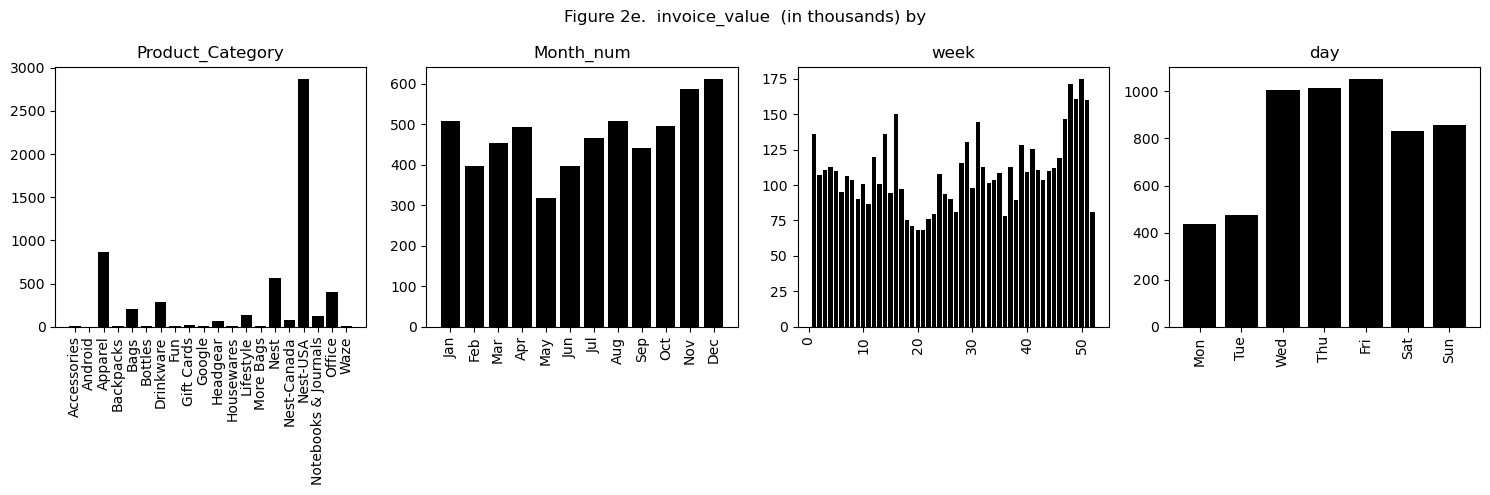

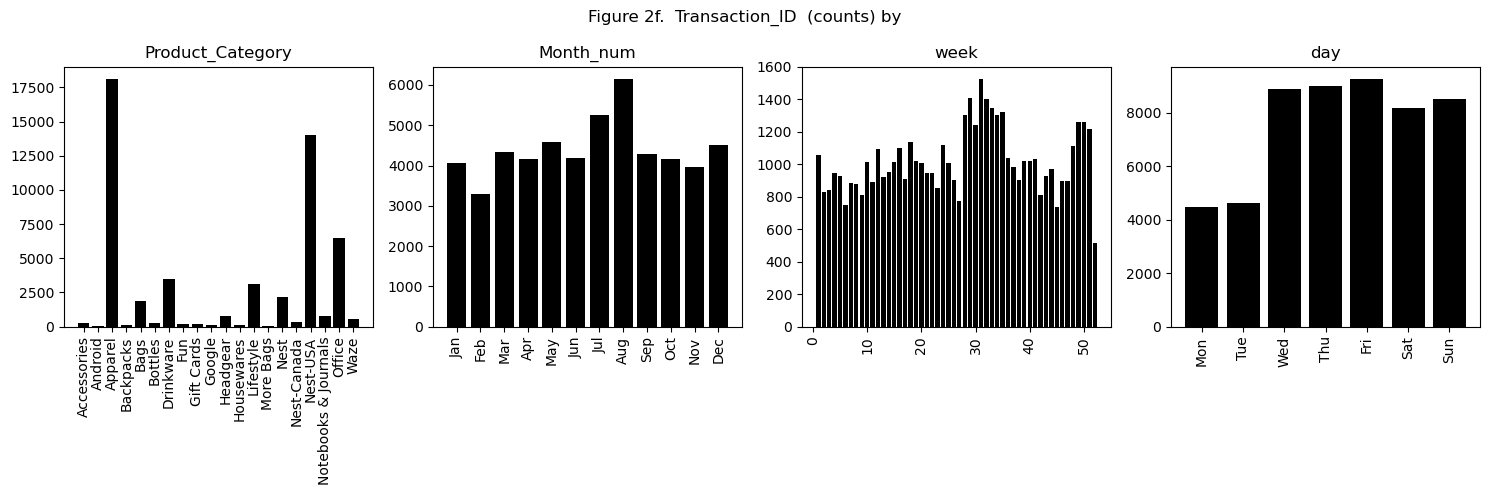

In [37]:
## Understand the trends/seasonality of sales by category, location, month etc…
grid_vals = ['Product_Category', 'Month_num', 'week', 'day']
by_gp = ['invoice_value', 'Transaction_ID','customer_acquisition_Month']
grid_len = len(grid_vals)
# revenue by 'Category'
def KPI_plot1(gp, val, div=1, sum_count = 'sum'):
    if sum_count == 'sum':
        df = osct.groupby([gp])[val].sum().reset_index()
    if sum_count == 'count':
        df = osct.groupby([gp])[val].count().reset_index()
    plt.bar(df[gp],df[val]/div, color='black')
    plt.xticks(rotation=90)
    plt.title(f"{gp}")
    
def KPI_grid(grid_vals, pre_title="", suff_title="", val='invoice_value', div=1, sum_count = 'sum'):
    plt.figure(figsize=(15, 5))
    plt.suptitle(f"{pre_title} {val} {suff_title} by")
    grid_len = len(grid_vals)
    ## rows, columns, current plot index 
    for i in range(grid_len):
        plt.subplot(1, grid_len, i+1)
        KPI_plot1(grid_vals[i],val, div,sum_count)
        if grid_vals[i] == 'Month_num':
            set_monthly_xticks(1)
        if grid_vals[i]=='day':
            set_day_of_week_ticks()

    plt.tight_layout()

KPI_grid(grid_vals, pre_title = "Figure 2e. ", suff_title=" (in thousands)", div=1000)
KPI_grid(grid_vals, val='Transaction_ID', pre_title = "Figure 2f. ", suff_title=" (counts)", sum_count='count')


### How number order varies and sales with different days?
- See Figure 2f Transaction Counts by day

In [38]:
# Calculate the Revenue, Marketing spend, percentage of marketing spend out of revenue, Tax, percentage of delivery charges by month.
KPI_df = pd.DataFrame({ 'KPI': ['Total Revenue', 'Marketing Spend', 'Marketing Spend as Percent of Revenue', 'Total Tax', 'Delivery Charges as Percent of Revenue'],
                        'Value': [osct['invoice_value'].sum(), 
                                 marketing_spending_df['Offline_Spend'].sum()+marketing_spending_df['Online_Spend'].sum(),
                                (marketing_spending_df['Offline_Spend'].sum()+marketing_spending_df['Online_Spend'].sum())*100/osct['invoice_value'].sum(),
                                osct['tax_applied'].sum(),
                                osct['Delivery_Charges'].sum()*100/osct['invoice_value'].sum()]
                                  })
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))
display(KPI_df)

,KPI,Value
0,Total Revenue,"5,673,745.82"
1,Marketing Spend,"1,733,546.47"
2,Marketing Spend as Percent of Revenue,30.55
3,Total Tax,"507,107.48"
4,Delivery Charges as Percent of Revenue,9.81


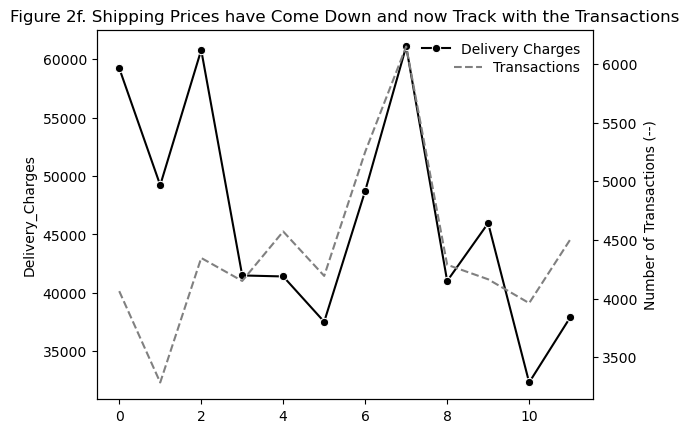

In [39]:
## Per month delivery charges
osct_delivery_monthly = osct.groupby(['Month_num'])['Delivery_Charges'].sum().reset_index()
osct_transaction_monthly = osct.groupby(['Month_num'])['Transaction_ID'].count().reset_index()
ax1 = sns.lineplot(osct_delivery_monthly['Delivery_Charges'], color='black', marker='o', label = "Delivery Charges")
ax2 = ax1.twinx()
ax2 = sns.lineplot(osct_transaction_monthly['Transaction_ID'], linestyle='--', color='gray', label = "Transactions")
plt.ylabel("Number of Transactions (--)")
plt.title("Figure 2f. Shipping Prices have Come Down and now Track with the Transactions")
ax1.legend(loc='upper right', bbox_to_anchor=(1, 1), frameon=False)
ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.95), frameon=False)

In [40]:
osct.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Month', 'Coupon_Code',
       'Discount_pct', 'GST', 'base_invoice', 'price_with_discount',
       'discount_applied', 'tax_applied', 'invoice_value',
       'invoice_value_ifNoDiscount', 'Year', 'Month_num',
       'customer_acquisition_date', 'customer_acquisition_Month',
       'new_existing_this_month', 'week', 'day'],
      dtype='object')

In [41]:
marketing_spending_df.columns

Index(['Date', 'Offline_Spend', 'Online_Spend'], dtype='object')

In [42]:
# How is revenue impacted by marketing spend?

In [43]:
# Which products appeared on most transactions?

In [44]:
# Which product was purchased mostly based on the quantity?

## 3. Performing Customer Segmentation
- Heuristic (Value based, RFM) – Divide the customers into Premium, Gold, Silver, Standard customers and define strategy on the same.
- Scientific (Using K-Means) & Understand the profiles. Define strategy for each segment.

## 4. Predicting Customer Lifetime Value (Low Value/Medium Value/High Value)
- First define dependent variable with categories low value, medium value, high value using customer revenue.
- Then perform Classification model

## 5. Cross-Selling (Which products are selling together)
- You can perform exploratory analysis & market basket analysis to understand which of items can be bundled together.

## 6. Predicting Next Purchase Day(How soon each customer can visit the store (0-30 days, 30-60days, 60-90 days, 90+ days)
- For this, we need create dependent variable at customer level (average days per one transaction for only repeat customers and divide into groups 0-30 days, 30-60 days, 60-90 days and 90+ days) then build classification model to predict next purchase of given customer.

## 7. Perform cohort analysis by defining below cohorts
- Customers who started in each month and understand their behaviour
- Which Month cohort has maximum retention?